In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
class AdalineGDB(object):
    """
    Clasificador Adaline de Ricardo
    Parametros:
    ----------------------
    eta: float, tasa de aprendizaje
    n_iter: int, numero de iteraciones max al dataset de entrenamiento
    seed: int, semilla aleatoria para la generacion de numeros aleatorios
    ----------------------
    Atributos:
    w_: array-1d, pesos actualizados tras el ajuste despues del entrenamiento
    cost_: list, lista de valores de la funcion de coste SSE por epoca
    """

    def __init__(self, eta=0.01, n_iter=50, seed=1):
        self.eta = eta
        self.n_iter = n_iter
        self.seed = seed

    def fit(self, X, y):
        """
        Funcion entrernamiento
        Parametros:
        ----------------------
        X: array-like, shape = [n_samples, n_features], vectores de entrenamiento
        y: array-like, shape = [n_samples], valores objetivo (target/label)
        ----------------------
        Devuelve:
        ----------------------
        self: object
        """

        rgen = np.random.RandomState(self.seed)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        
        return self
    
    def net_input(self, X):
        """
        Calcular el valor z
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """
        Devuelve la clase etiquetada
        """
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    
    def activation(self, X):
        """
        Funcion de activacion
        """
        return X


### PREGUNTA 1: La fórmula de la línea 43 self.eta * errores.sum() es la actualización de:
- **El bias, el parámetro w0 de la neurona.** (X)
- El resto de parámetros w1 ... wn de la neurona

### PREGUNTA 2: Si eliminamos o comentamos la línea 40 del código
- **No aplicamos la función de activación y la neurona no hará bien su trabajo.** (X)
- No pasa nada porque al ser la función identidad en realidad no hace falta aplicarla, no hace
cambios, se usa para que se vea que la tiene.

Ultimo coste:  8.895049170892875e+125


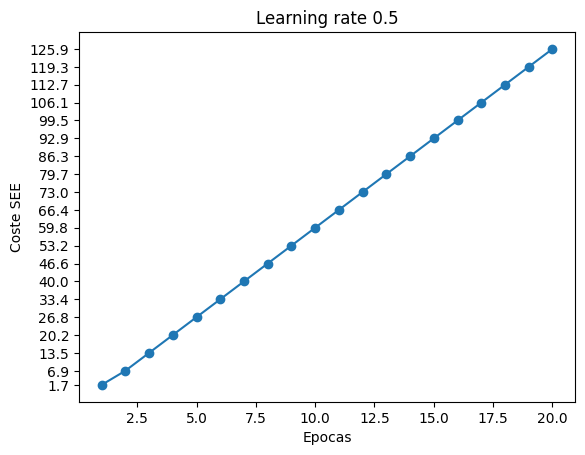

In [3]:
## Cargar el dataset y entrenar la neurona Adaline
df = pd.read_csv('iris.data', header=None, encoding='utf-8')

## Prepara los datos de entrenamiento
y = df.iloc[0:100, 4].values ## Extraer las clases de las flores (Setosa y Versicolor)
y = np.where(y == 'Iris-setosa', -1, 1) ## Convertir las clases a -1 y 1 respectivamente (Setosa = -1, Versicolor = 1)
X = df.iloc[0:100, [0, 2]].values ## Extraer las caracteristicas de longitud del sepalo y longitud del petalo

## Entrenar el modelo y ver la grafica de la funcion de coste
learning_rate = 0.5
ada1 = AdalineGDB(n_iter=20, eta=learning_rate).fit(X, y)

fig, ax = plt.subplots()
ax.plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax.set_yticks(np.log10(ada1.cost_))
plt.xlabel('Epocas')
plt.ylabel('Coste SEE')
plt.title(f'Learning rate {learning_rate}')
print("Ultimo coste: ", ada1.cost_[-1])


### PREGUNTA 3: Entrega el nuevo gráfico y responde:
- ¿Cómo se ve ahora el gráfico? Se muestra una recta con crecimiento exponecial entre el numero de epocas su funcion de coste
- ¿Qué función de coste está usando? (marca una) (X)SSE (_)MSE (_)RMSE (_)GD
- A la vista del gráfico ¿Cuanto más estudia más aprende? No el modelo no está aprendiendo correctamente, ya que el coste (SEE) debería disminuir o al menos estabilizarse con las épocas si el aprendizaje fuese exitoso.
- ¿Qué valor de error comete cuando ha estudiado las 20 veces?  El error es de 125.9
¿Y en escala logarítmica? En escala logaritmica de 2.10

Ultimo coste:  33.05797043399406


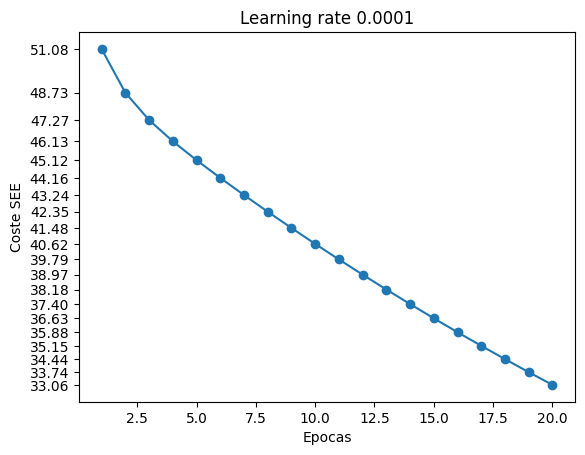

In [4]:
'''El error debe ir bajando a medida que estudie, si no lo hace hay algún problema. Vamos a comenzar
ajustando el learning rate. Copia el código anterior en una nueva celda de un notebook y vuelve a
usar escala lineal (quita los logaritmos de los datos que usamos). Prueba con 0.1 (dividiendo por 5 el
anterior) y luego sigue dividiendo por 10 el valor del learning_rate y probando hasta que consigas el
mínimo error.'''

## Entrenar el modelo y ver la grafica de la funcion de coste
learning_rate = 0.0001
ada1 = AdalineGDB(n_iter=20, eta=learning_rate).fit(X, y)

fig, ax = plt.subplots()
ax.plot(range(1, len(ada1.cost_) + 1),ada1.cost_, marker='o')
ax.set_yticks(ada1.cost_)
plt.xlabel('Epocas')
plt.ylabel('Coste SEE')
plt.title(f'Learning rate {learning_rate}')
print("Ultimo coste: ", ada1.cost_[-1])


### PREGUNTA 4: Indica los valores que has encontrado:
- Valor del learning rate que hace mínimo el error usando 20 épocas:
El valor del learning rate minimo es de: 0.0001
- ¿Qué valor de error consigues? Consigo un valor de error de 33.05797043399406

Medias:  [5.471 2.862]
Desviaciones:  [0.63848179 1.44130358]
Ultimo coste:  6.331124721890539e+75


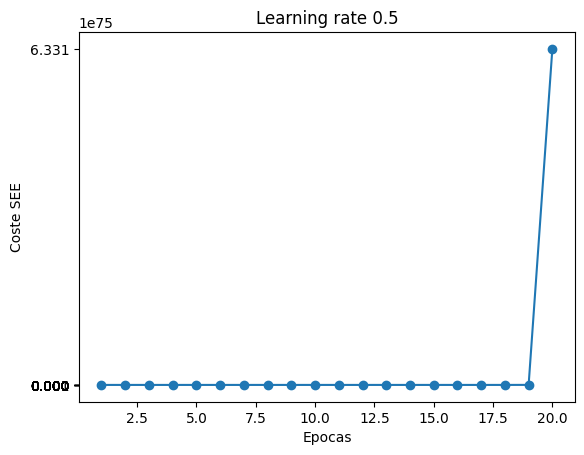

In [5]:
'''
PREPROCESAR LOS DATOS ANTES DE ENTRENAR.
Si escalamos los valores de las características los algoritmos de tipo descenso por gradiente
funcionarán mejor. Vamos a escalar los datos a mano antes de iniciar el proceso de aprendizaje. Crea
una nueva celda donde primero normalizamos las características. A continuación vuelve a copiar el
código anterior y ajusta de nuevo el learning_rate comenzando por 0.5.
'''

mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)
print("Medias: ", mean_X)
print("Desviaciones: ", std_X)

X_norm = (X - mean_X) / std_X

## Entrenar el modelo y ver la grafica de la funcion de coste
learning_rate = 0.5
ada1 = AdalineGDB(n_iter=20, eta=learning_rate).fit(X_norm, y)

fig, ax = plt.subplots()
ax.plot(range(1, len(ada1.cost_) + 1),ada1.cost_, marker='o')
ax.set_yticks(ada1.cost_)
plt.xlabel('Epocas')
plt.ylabel('Coste SEE')
plt.title(f'Learning rate {learning_rate}')
print("Ultimo coste: ", ada1.cost_[-1])




### PREGUNTA 5: Entrega el resultado de la ejecución y responde:
- Valor del learning rate que hace mínimo el error usando 20 épocas: Ultimo coste es de: 6.331124721890539e+75
- ¿Qué valor de error consigues? Un valor muy alto 6.331124721890539e+75
- ¿Mejor o peor si escalas las características? Un poco mejor 
- Marca las opciones que sean ciertas:
  [X]Con características escaladas el Descenso por Gradiente aprende más rápido.
  [X]Para la misma cantidad de entrenamiento (estudio) el Descenso por Gradiente aprende más con características escaladas.
  [X]El learning rate puede ser mayor con características escaladas.

/tmp/ipykernel_1082/1449548681.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=[cmap(idx)], marker=markers[idx], label=cl, edgecolor='black')


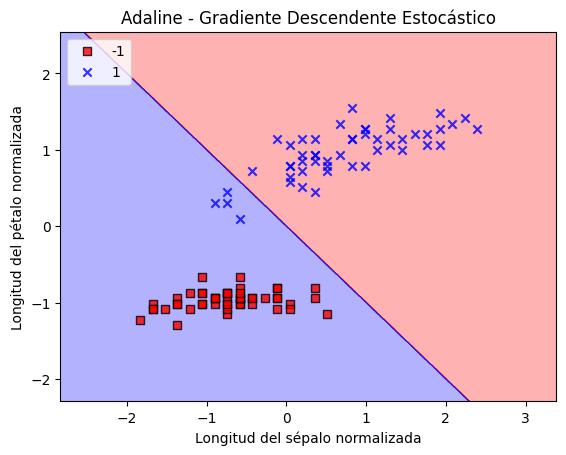

In [6]:
## Paso 5: Funcion para visualizar las regiones de decision

def plot_regions (X,y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Dibuja la superficie de decision
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Dibuja las clases de los ejemplos
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=[cmap(idx)], marker=markers[idx], label=cl, edgecolor='black')

## Visualizar las regiones de decision
plot_regions(X_norm, y, classifier=ada1)


# Mostrar la gráfica
plt.xlabel('Longitud del sépalo normalizada')
plt.ylabel('Longitud del pétalo normalizada')
plt.title('Adaline - Gradiente Descendente Estocástico')
plt.legend(loc='upper left')
plt.show()

In [21]:
class AdalineDGS(object):
    def __init__(self, eta=0.01, n_iter=50, seed=1, shuffle=True):
        self.eta = eta
        self.n_iter = n_iter
        self.seed = seed
        self.shuffle = shuffle
        self.w_initialized = False

    def fit(self, X, y):
        """
        Parametros:
        ----------------------
        X: array-like, shape = [n_samples, n_features], vectores de entrenamiento
        y: array-like, shape = [n_samples], valores objetivo (target/label)
        self: object
        """

        self._initialize_weights(X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    

    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.seed)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
    
    def net_input(self, X):
        """
        Calcular el valor z
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """
        Funcion de activacion
        """
        return X

    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = target - output
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    

Ultimo coste:  0.025269618641442088


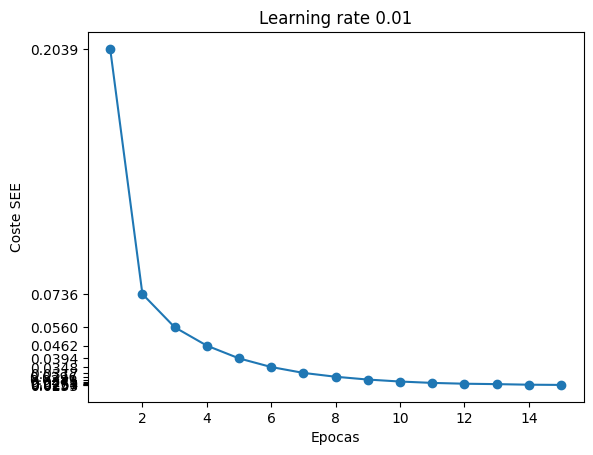

In [24]:
## Entrenamos el modelo
learning_rate = 0.01
ada2 = AdalineDGS(n_iter=15, eta=learning_rate, seed=1)
ada2.fit(X_norm, y)


fig, ax = plt.subplots()
ax.plot(range(1, len(ada2.cost_) + 1),ada2.cost_, marker='o')
ax.set_yticks(ada2.cost_)
plt.xlabel('Epocas')
plt.ylabel('Coste SEE')
plt.title(f'Learning rate {learning_rate}')
print("Ultimo coste: ", ada2.cost_[-1])

### ACTIVIDAD 3. USAR MODELOS YA PROGRAMADOS.

Normalmente no tendremos que programar a bajo nivel los algoritmos, de hecho, casi siempre los
usaremos los que ya tienen prefabricados las librerías. Por ejemplo, el Perceptron y Adaline usados
como clasificadores son muy básicos, pero los tenemos implementados en las librería scikit-learn.
Librerías como esta no solo ofrecen una gran cantidad de algoritmos implementados sino también
muchas utilidades para realizar de manera rápida la validación, la medición del desempeño, etc

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Diferentes clases ', np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

print("Contar labels en y: ", np.bincount(y))
print("Contar labels en y_train: ", np.bincount(y_train))
print("Contar labels en y_test: ", np.bincount(y_test))

Diferentes clases  [0 1 2]
Contar labels en y:  [50 50 50]
Contar labels en y_train:  [35 35 35]
Contar labels en y_test:  [15 15 15]


### PREGUNTA 8: Marca las respuestas sobre estos parámetros de la función train_test_split():

 1. El parámetro ramdon_state=valor nos va a permitir:

- ✔Que si ejecutamos dos veces el código, dará los mismos resultados porque inicializa todo lo que ocurra de manera aleatoria al mismo valor.

- O Que todo ocurra de manera impredecible y difícil de repetir.

2. El parámetro stratify = y nos va a permitir:

- ✔ Que los datos queden balanceados, que tengan cantidades similares de cada clase.

- O Que los ejemplos se cojan en grupos como si formasen estratos.

3. El parámetro size = 0.3 nos va a permitir:

- O Que el 30% de los datos se usan para entrenar.

- ✔ Que el 30% de los datos se usan para testar el modelo.

- O Que no se cogen el 30% de los datos para mejorar la aleatoriedad de los datos.

Escalamos las características normalizándolas o estandarizándolas para mejorar el funcionamiento del
algoritmo de gradiente por descenso. Se aplica la transformación por separado al train y al test pero se
ha configurado de la misma manera usando los datos del train. Es decir, siempre se usa la misma
media y desviación para normalizar ambos conjuntos de datos. 

/tmp/ipykernel_1082/4182896212.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=[cmap(idx)], marker=markers[idx], label=cl, edgecolor='black')


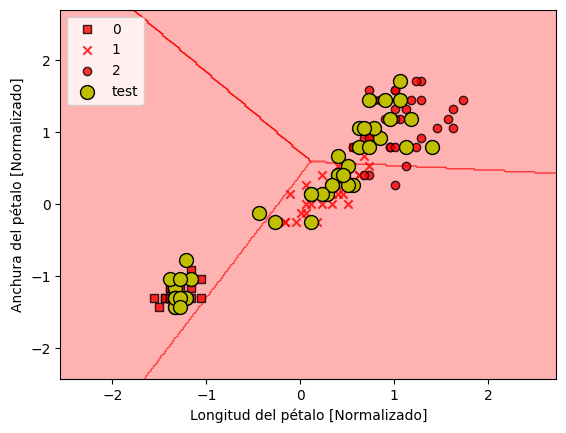

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


def plot_regions(X,y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red, blue, lightgreen, gray, cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=[cmap(idx)], marker=markers[idx], label=cl, edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='y', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test')

    
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Longitud del pétalo [Normalizado]')
plt.ylabel('Anchura del pétalo [Normalizado]')
plt.legend(loc='upper left')
plt.show()